<a href="https://colab.research.google.com/github/lledson425/Summer25/blob/main/VAE_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install "tensorflow-probability[tf]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 596.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00


In [24]:
import os
import sys
import numpy as np
from VAE import VAE
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import sklearn.cluster as skl_cluster
from sklearn import manifold, decomposition, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
import sklearn.cluster as skl_cluster
from sklearn import manifold, decomposition, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
import statistics

data_dir = "images8"

# Get sorted list of all 100 files
file_list = sorted(os.listdir(data_dir))

# Initialize data storage
data = []

# Load and process data: each line from every file
for file_name in file_list:
    with open(os.path.join(data_dir, file_name), 'r') as f:
        for line in f:
            values = [int(x) for x in line.strip().split()]
            data.append(values)

data = np.array(data)
print(data.size)
print(data)


665600
[[-1 -1 -1 ... -1 -1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [ 1  1  1 ... -1  1  1]
 [-1 -1 -1 ... -1  1  1]
 [-1  1 -1 ... -1 -1 -1]]


In [25]:
print("Raw shape:", data.shape)
side = int(data.shape[1]**0.5)
print("Inferred side length:", side)

Raw shape: (10400, 64)
Inferred side length: 8


In [26]:
#VAE expect images so we need to unflatten the data
flat_data = data
side_length = int(data.shape[1]**0.5)
data = data.reshape(-1, side_length, side_length)  # Shape: (4000, 32, 32)
# np.savetxt("ising_dataset.txt", data.reshape(data.shape[0], -1), delimiter=',')
print(data)
print(data.size)

[[[-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]
  ...
  [-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1 -1]]

 [[ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  ...
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]]

 [[ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  ...
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]]

 ...

 [[ 1  1  1 ...  1 -1  1]
  [ 1  1  1 ... -1 -1 -1]
  [-1  1  1 ... -1 -1 -1]
  ...
  [ 1  1 -1 ... -1 -1  1]
  [-1  1 -1 ... -1 -1 -1]
  [ 1  1  1 ... -1  1  1]]

 [[-1 -1 -1 ... -1  1  1]
  [ 1  1  1 ... -1 -1  1]
  [-1 -1 -1 ... -1  1  1]
  ...
  [ 1  1  1 ...  1  1 -1]
  [ 1 -1 -1 ...  1 -1  1]
  [ 1 -1  1 ... -1  1  1]]

 [[-1  1 -1 ... -1 -1 -1]
  [ 1  1  1 ... -1 -1 -1]
  [-1 -1 -1 ... -1 -1  1]
  ...
  [-1  1  1 ...  1 -1 -1]
  [-1  1  1 ... -1 -1 -1]
  [ 1  1  1 ... -1 -1 -1]]]
665600


In [20]:
print("Raw shape:", data.shape)

Raw shape: (10400, 16, 16)


In [4]:
split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

# Train VAE
vae = VAE(train_images=train_data, test_images=test_data, epochs=50, batch_size=20)
vae.saveModel("ising_vae938.keras")


Epoch: 50, Test set ELBO: -7.4380, time elapse for current epoch: 0.25s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [27]:
model_path = "ising_vae8.keras"
vae = VAE(load=model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


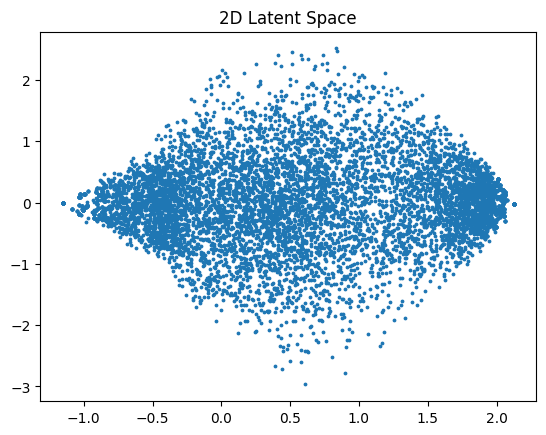

In [28]:
means, logvars = vae.encode(data, both=True)
# Plot the 2D latent space
plt.scatter(means[:, 0], means[:, 1], s=3)
plt.title("2D Latent Space")
plt.show()

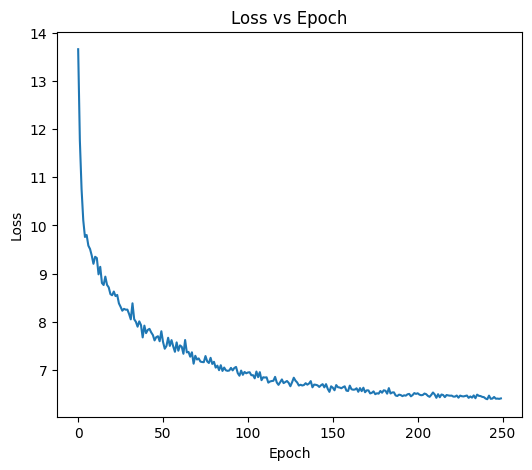

In [12]:
vae.plot_loss()
variances = np.exp(logvars)

In [6]:
temperature_list = [
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
    1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
    2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
    2.1, 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19,
    2.2, 2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29,
    2.3, 2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39,
    2.4, 2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49,
    2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
    2.6,
    2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5,
    3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5,
    4.6, 4.7, 4.8, 4.9, 5.0
]


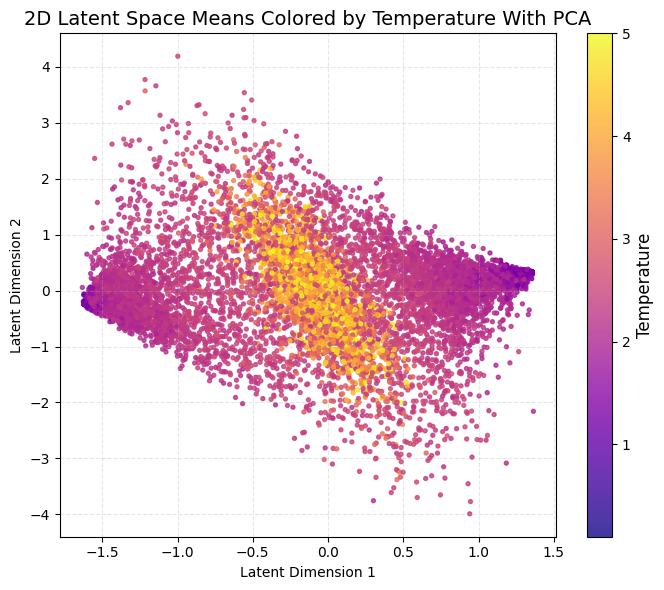

In [7]:

# temperature_list = [0.01, 0.14, 0.27, 0.40, 0.53, 0.66, 0.79, 0.92, 1.05, 1.18,
#                     1.31, 1.44, 1.57, 1.70, 1.83, 1.96, 2.09, 2.22, 2.35, 2.48,
#                     2.61, 2.74, 2.87, 3.00, 3.13, 3.26, 3.39, 3.52, 3.65, 3.78,
#                     3.91, 4.04, 4.17, 4.30, 4.43, 4.56, 4.69, 4.82, 4.95, 5.00]

temperature_labels = temperature_list * (len(means) // len(temperature_list))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(means)

plt.figure(figsize=(7, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=temperature_labels, cmap='plasma', s=8, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label("Temperature", fontsize=12)

plt.title("2D Latent Space Means Colored by Temperature With PCA", fontsize=14)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


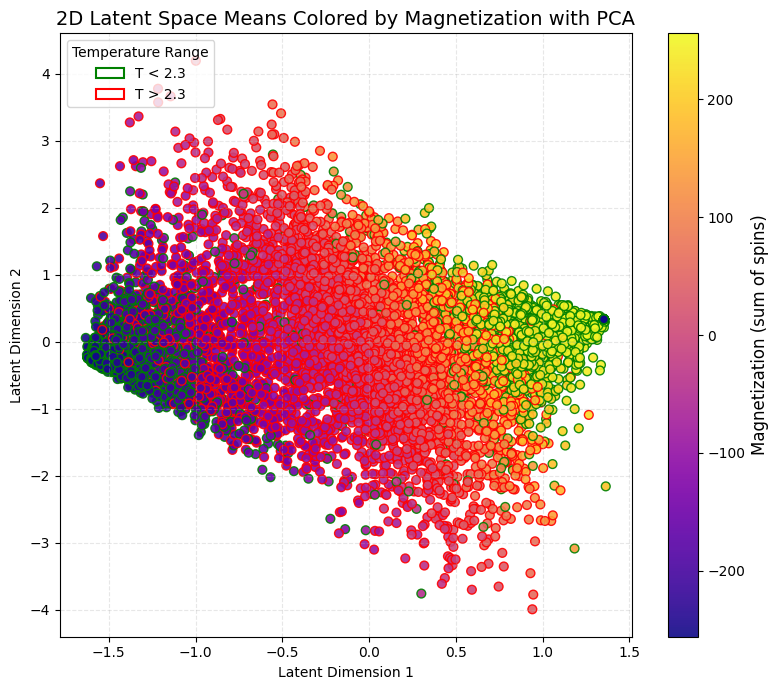

In [8]:
import matplotlib.patches as mpatches

# Compute magnetization = sum of spins per config
magnetizations = np.sum(flat_data, axis=1)

# Assign temperature labels
temperature_labels = temperature_list * (len(means) // len(temperature_list))
temperature_labels = np.array(temperature_labels)

# Color outline: green if T > 2.3, blue otherwise
outline_colors = np.where(temperature_labels > 2.3, 'red', 'green')

# Plot
plt.figure(figsize=(8, 7))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=magnetizations,
    cmap='plasma',
    edgecolors=outline_colors,
    linewidths=1.0,
    s=40,
    alpha=0.9,
)

legend_patches = [
    mpatches.Patch(edgecolor='green', facecolor='white', label='T < 2.3', linewidth=1.5),
    mpatches.Patch(edgecolor='red', facecolor='white', label='T > 2.3', linewidth=1.5),
]
plt.legend(handles=legend_patches, loc='upper left', title='Temperature Range')


cbar = plt.colorbar(scatter)
cbar.set_label("Magnetization (sum of spins)", fontsize=12)

plt.title("2D Latent Space Means Colored by Magnetization with PCA", fontsize=14)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

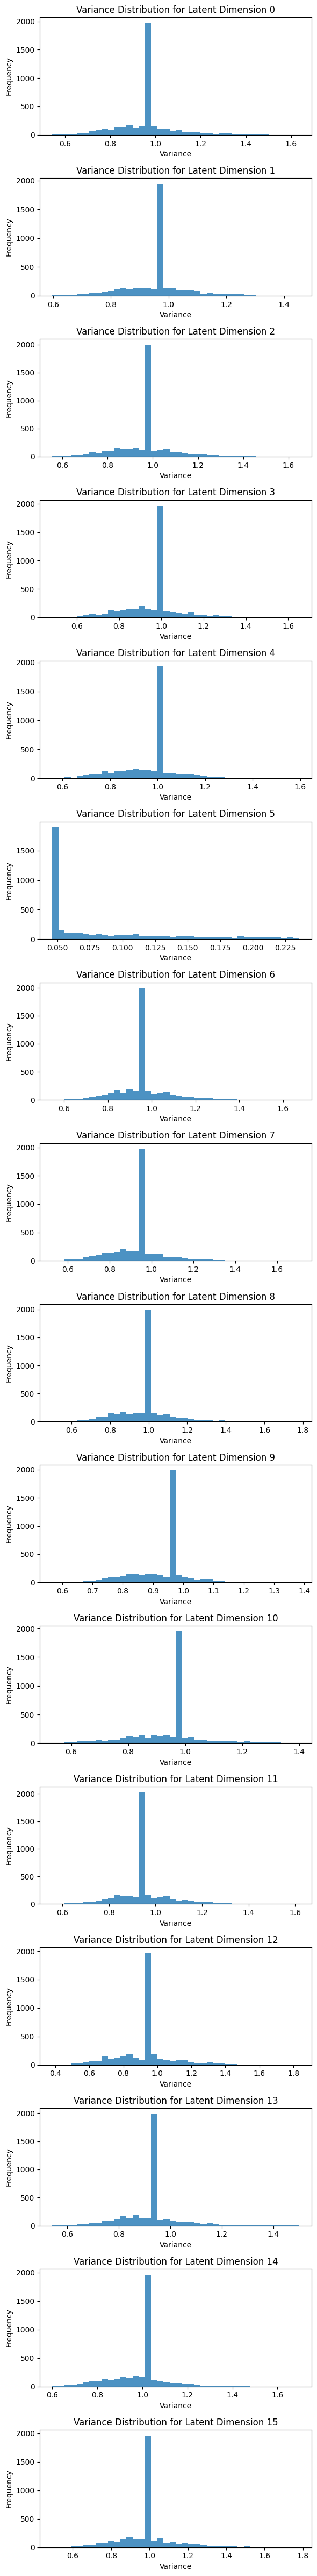

In [15]:
latent_dim = variances.shape[1]
fig, axes = plt.subplots(latent_dim, 1, figsize=(6, 3 * latent_dim))

for i in range(latent_dim):
    ax = axes[i] if latent_dim > 1 else axes
    ax.hist(variances[:, i], bins=40, alpha=0.8)
    ax.set_title(f"Variance Distribution for Latent Dimension {i}")
    ax.set_xlabel("Variance")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
sample_idx = 0
plt.bar(range(latent_dim), variances[sample_idx])
plt.xlabel("Latent Dimension")
plt.ylabel("Variance")
plt.title(f"Variance in Latent Space for Sample {sample_idx}")
plt.show()

NameError: name 'latent_dim' is not defined

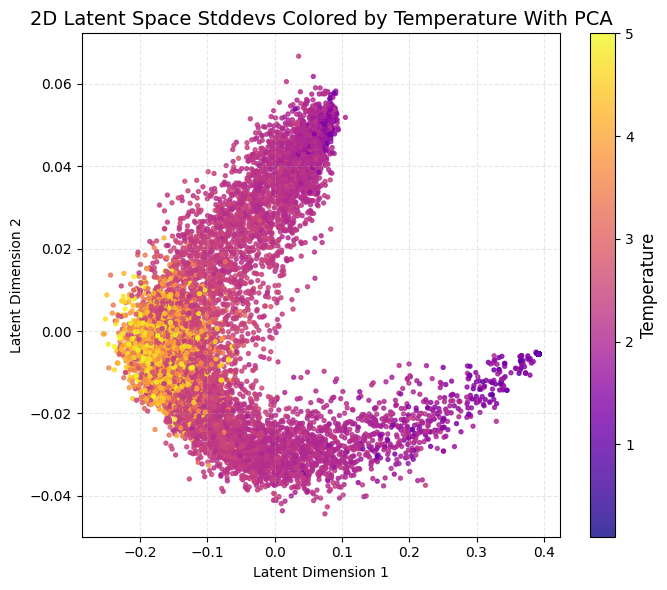

In [25]:
stddevs = np.exp(vae.encode(data, mean = False))**0.5

# temperature_list = [0.01, 0.14, 0.27, 0.40, 0.53, 0.66, 0.79, 0.92, 1.05, 1.18,
#                     1.31, 1.44, 1.57, 1.70, 1.83, 1.96, 2.09, 2.22, 2.35, 2.48,
#                     2.61, 2.74, 2.87, 3.00, 3.13, 3.26, 3.39, 3.52, 3.65, 3.78,
#                     3.91, 4.04, 4.17, 4.30, 4.43, 4.56, 4.69, 4.82, 4.95, 5.00]

temperature_labels = temperature_list * (len(stddevs) // len(temperature_list))

# PCA on standard deviations
pca = PCA(n_components=2)
pca_result_std = pca.fit_transform(stddevs)

# Plot
plt.figure(figsize=(7, 6))
scatter = plt.scatter(pca_result_std[:, 0], pca_result_std[:, 1], c=temperature_labels, cmap='plasma', s=8, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label("Temperature", fontsize=12)

plt.title("2D Latent Space Stddevs Colored by Temperature With PCA", fontsize=14)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

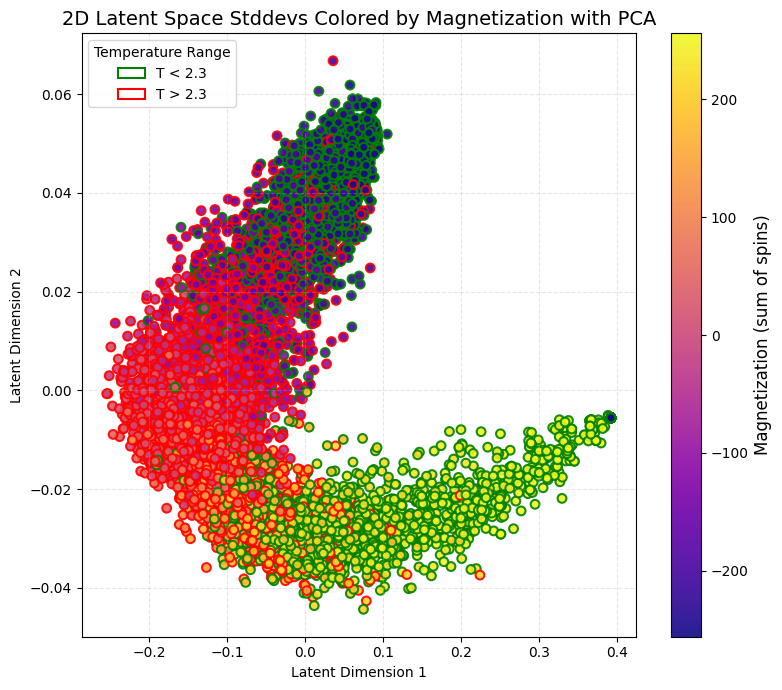

In [26]:

# Compute magnetization = sum of spins per configuration
magnetizations = np.sum(flat_data, axis=1)

# Assign temperature labels (make sure sizes match)
temperature_labels = temperature_list * (len(stddevs) // len(temperature_list))
temperature_labels = np.array(temperature_labels)

# Outline color by temperature: red if T > 2.3, green otherwise
outline_colors = np.where(temperature_labels > 2.3, 'red', 'green')

# Plot
plt.figure(figsize=(8, 7))
scatter = plt.scatter(
    pca_result_std[:, 0], pca_result_std[:, 1],
    c=magnetizations,
    cmap='plasma',
    edgecolors=outline_colors,
    linewidths=1.5,
    s=40,
    alpha=0.9,
)

# Legend for outlines
legend_patches = [
    mpatches.Patch(edgecolor='green', facecolor='white', label='T < 2.3', linewidth=1.5),
    mpatches.Patch(edgecolor='red', facecolor='white', label='T > 2.3', linewidth=1.5),
]
plt.legend(handles=legend_patches, loc='upper left', title='Temperature Range')

# Colorbar for magnetization
cbar = plt.colorbar(scatter)
cbar.set_label("Magnetization (sum of spins)", fontsize=12)

# Labels and formatting
plt.title("2D Latent Space Stddevs Colored by Magnetization with PCA", fontsize=14)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

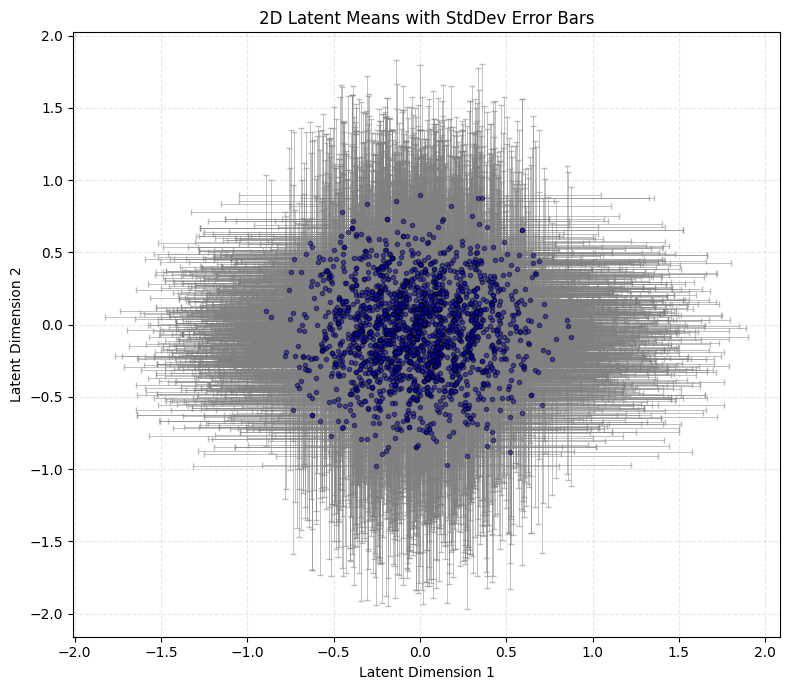

In [18]:
plt.figure(figsize=(8, 7))

# Plot points with error bars
plt.errorbar(
    means[:, 0], means[:, 1],
    xerr=stddevs[:, 0], yerr=stddevs[:, 1],
    fmt='o', ecolor='gray', elinewidth=0.7, capsize=2, alpha=0.5,
    markerfacecolor='blue', markeredgecolor='black', markersize=3, linestyle='none'
)

# Labels and title
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("2D Latent Means with StdDev Error Bars")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


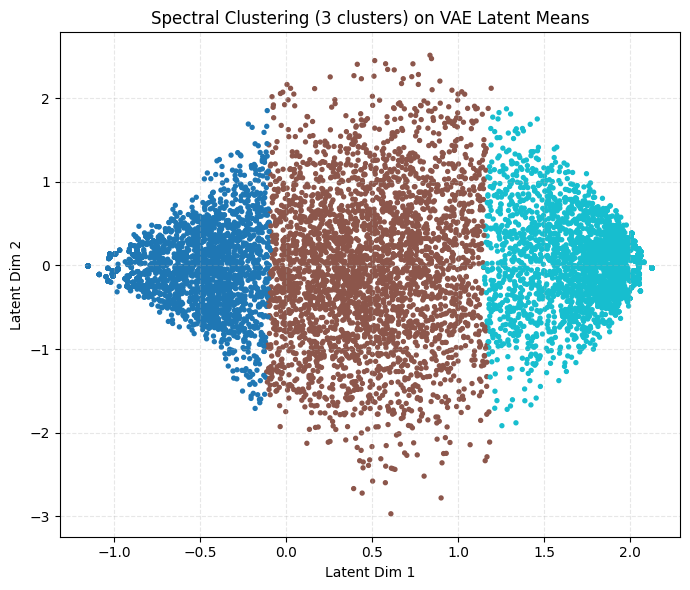

In [29]:
fitImgsVAE = vae.encode(data)
fitImgsSTD = np.exp(vae.encode(data, mean = False))**0.5


# Define Tc
Tc = 2.3

# Build Gaussian distributions per dimension
gaussians1 = [statistics.NormalDist(mu=fitImgsVAE[i, 0], sigma=fitImgsSTD[i, 0]) for i in range(len(fitImgsVAE))]
gaussians2 = [statistics.NormalDist(mu=fitImgsVAE[i, 1], sigma=fitImgsSTD[i, 1]) for i in range(len(fitImgsVAE))]

# Compute Gaussian overlap matrices for each dimension
overlap1 = np.array([[x.overlap(y) for y in gaussians1] for x in gaussians1])
overlap2 = np.array([[x.overlap(y) for y in gaussians2] for x in gaussians2])

# Combine overlaps into a single similarity matrix ===
overlap = overlap1 * overlap2  # shape: (N, N)

# Spectral Clustering
clusters = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42).fit_predict(overlap)

plt.figure(figsize=(7,6))
plt.scatter(fitImgsVAE[:, 0], fitImgsVAE[:, 1], c=clusters, cmap='tab10', s=8)
plt.title("Spectral Clustering (3 clusters) on VAE Latent Means")
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Best cluster-label match: (1, 2, 0), Accuracy = 0.438


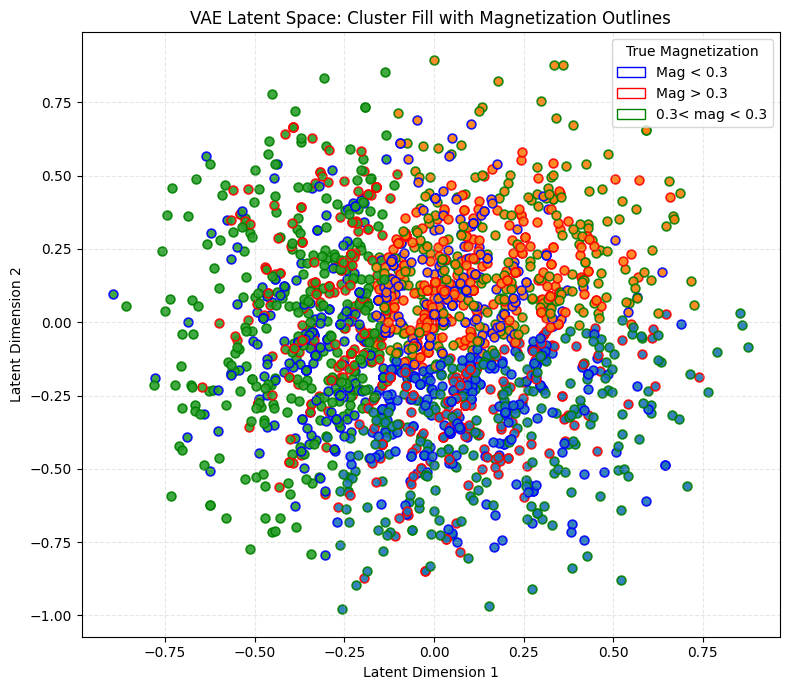

In [21]:
from itertools import permutations
from sklearn.metrics import confusion_matrix

# Define physical labels: 0 = negative mag, 1 = positive mag, 2 = disordered
def label_by_magnetization(mags, threshold=.3):
    labels = []
    for m in mags:
        if m > threshold:
            labels.append(1)  # Positive mag
        elif m < -threshold:
            labels.append(0)  # Negative mag
        else:
            labels.append(2)  # Disordered
    return np.array(labels)

L = 4  # or whatever your lattice size is
max_mag = L * L
magnetizations = np.array(magnetizations)
magnetizations_norm = magnetizations / max_mag

# Generate labels
true_labels = label_by_magnetization(magnetizations_norm)

# Perform spectral clustering
clusters = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42).fit_predict(overlap)

fill_cmap = plt.cm.tab10

# Outline colors for true labels
outline_colors = np.array([
    'blue' if label == 0 else 'red' if label == 1 else 'green'  # 0: neg, 1: pos, 2: disordered
    for label in true_labels
])

best_acc = 0
best_perm = None
for perm in permutations([0, 1, 2]):
    remapped = np.array([perm[c] for c in clusters])
    acc = np.mean(remapped == true_labels)
    if acc > best_acc:
        best_acc = acc
        best_perm = perm

# Remap clusters for best match
final_clusters = np.array([best_perm[c] for c in clusters])
print(f"Best cluster-label match: {best_perm}, Accuracy = {best_acc:.3f}")

# Plot with colored outlines
plt.figure(figsize=(8, 7))
for i in range(len(fitImgsVAE)):
    plt.scatter(
        fitImgsVAE[i, 0], fitImgsVAE[i, 1],
        facecolor=fill_cmap(final_clusters[i]),
        edgecolor=outline_colors[i],
        linewidth=1.2,
        s=40,
        alpha=0.9
    )

# Custom legend
legend_elements = [
    Patch(facecolor='white', edgecolor='blue', label='Mag < 0.3'),
    Patch(facecolor='white', edgecolor='red', label='Mag > 0.3'),
    Patch(facecolor='white', edgecolor='green', label='0.3< mag < 0.3'),
]
plt.legend(handles=legend_elements, title="True Magnetization")

plt.title("VAE Latent Space: Cluster Fill with Magnetization Outlines")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Exception ignored in: <function _xla_gc_callback at 0x783aa7da5800>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

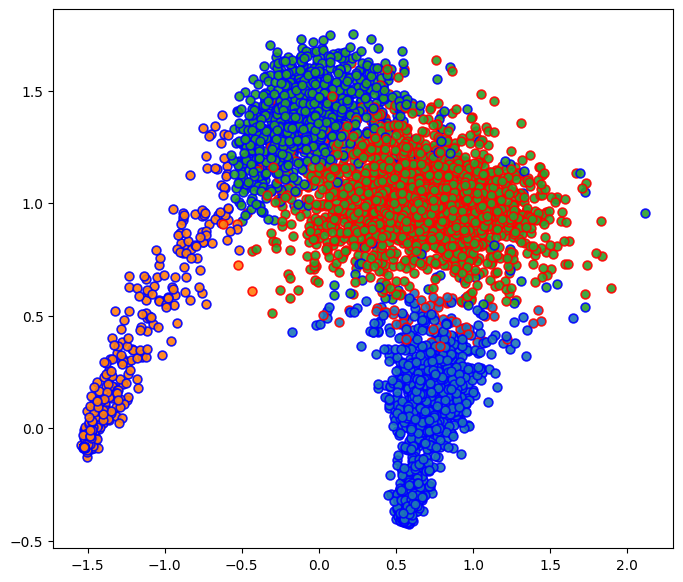

In [ ]:
temps = np.array(temperature_labels)
Tc = 2.3

# Determine outline color based on temperature
outline_colors = np.where(temps < Tc, 'blue', 'red')

# Plot with colored outlines
plt.figure(figsize=(8, 7))
for i in range(len(fitImgsVAE)):
    plt.scatter(
        fitImgsVAE[i, 0], fitImgsVAE[i, 1],
        facecolor=fill_cmap(final_clusters[i]),
        edgecolor=outline_colors[i],
        linewidth=1.2,
        s=40,
        alpha=0.9
    )

# Custom legend
legend_elements = [
    Patch(facecolor='white', edgecolor='blue', label='T < Tc'),
    Patch(facecolor='white', edgecolor='red', label='T>Tc'),
]
plt.legend(handles=legend_elements, title="Temperature")

plt.title("VAE Latent Space: Cluster Fill with Temp Outlines")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




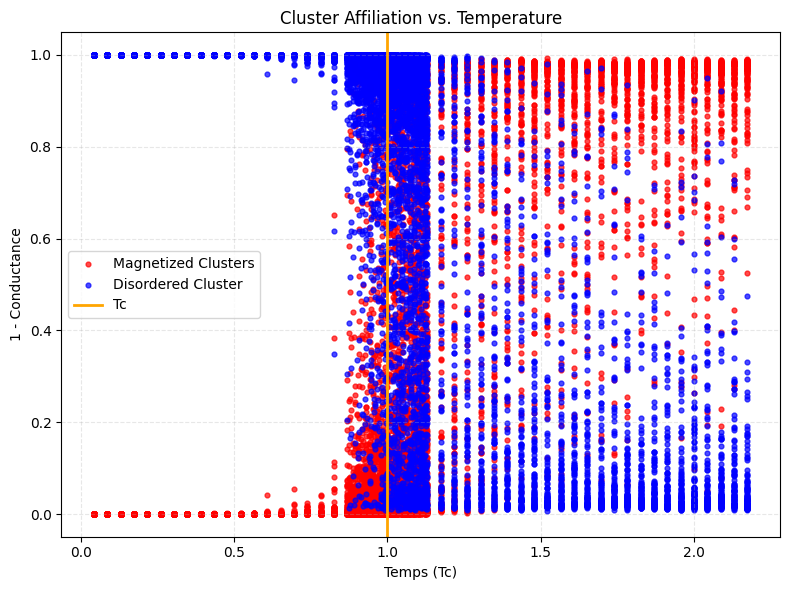

In [31]:
# Inputs
Tc = 2.3
temps = np.array(temperature_labels)
temps_scaled = temps / Tc
n = len(temps)

# Spectral clustering: assume `overlap` is your similarity matrix
# and `clusters` is the cluster assignment for each point

# Define which cluster(s) are magnetized (e.g., from inspection)
magnetized_clusters = {2, 0}
disordered_cluster = list(set(clusters) - magnetized_clusters)[0]

# Compute conductance score for each point to each cluster
def compute_conductance(overlap, clusters, target_cluster, eps=1e-12):
    scores = []
    for i in range(overlap.shape[0]):
        cluster_mask = (clusters == target_cluster)
        same_cluster = overlap[i, cluster_mask]
        all_total = np.sum(overlap[i])
        score = np.sum(same_cluster) / (all_total + eps)
        scores.append(score)
    return np.array(scores)


# Combine the two magnetized clusters
magnetized_mask = np.isin(clusters, list(magnetized_clusters))
magnetized_score = compute_conductance(overlap, clusters, list(magnetized_clusters)[0]) \
                 + compute_conductance(overlap, clusters, list(magnetized_clusters)[1])

# Disordered cluster
disordered_score = compute_conductance(overlap, clusters, disordered_cluster)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(temps_scaled, 1 - magnetized_score, color='red', s=12, alpha=0.7, label='Magnetized Clusters')
plt.scatter(temps_scaled, 1 - disordered_score, color='blue', s=12, alpha=0.7, label='Disordered Cluster')

# Tc vertical line
plt.axvline(1.0, color='orange', linewidth=2, label='Tc')

# Labels
plt.xlabel("Temps (Tc)")
plt.ylabel("1 - Conductance")
plt.title("Cluster Affiliation vs. Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


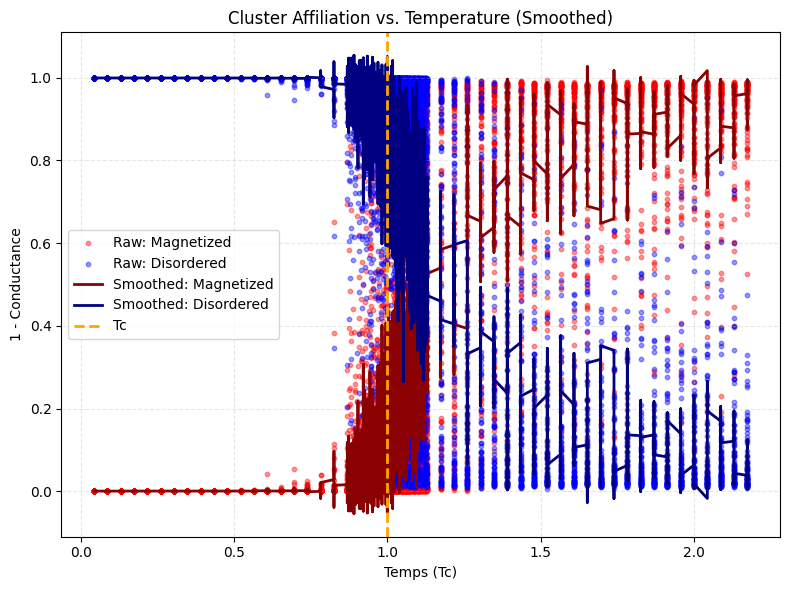

In [32]:
from scipy.signal import savgol_filter

sorted_indices = np.argsort(temps_scaled)
temps_sorted = temps_scaled[sorted_indices]
magnetized_sorted = (1 - magnetized_score)[sorted_indices]
disordered_sorted = (1 - disordered_score)[sorted_indices]

# Apply Savitzky-Golay smoothing
# window_length must be odd and < len(data); polyorder=2 for trend-preserving
window = 21 if len(temps_sorted) >= 21 else (len(temps_sorted) // 2) * 2 + 1
mag_smooth = savgol_filter(magnetized_sorted, window_length=window, polyorder=3)
dis_smooth = savgol_filter(disordered_sorted, window_length=window, polyorder=3)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(temps_sorted, magnetized_sorted, color='red', s=10, alpha=0.4, label='Raw: Magnetized')
plt.scatter(temps_sorted, disordered_sorted, color='blue', s=10, alpha=0.4, label='Raw: Disordered')
plt.plot(temps_sorted, mag_smooth, color='darkred', linewidth=2, label='Smoothed: Magnetized')
plt.plot(temps_sorted, dis_smooth, color='navy', linewidth=2, label='Smoothed: Disordered')
plt.axvline(1.0, color='orange', linewidth=2, linestyle='--', label='Tc')

plt.xlabel("Temps (Tc)")
plt.ylabel("1 - Conductance")
plt.title("Cluster Affiliation vs. Temperature (Smoothed)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

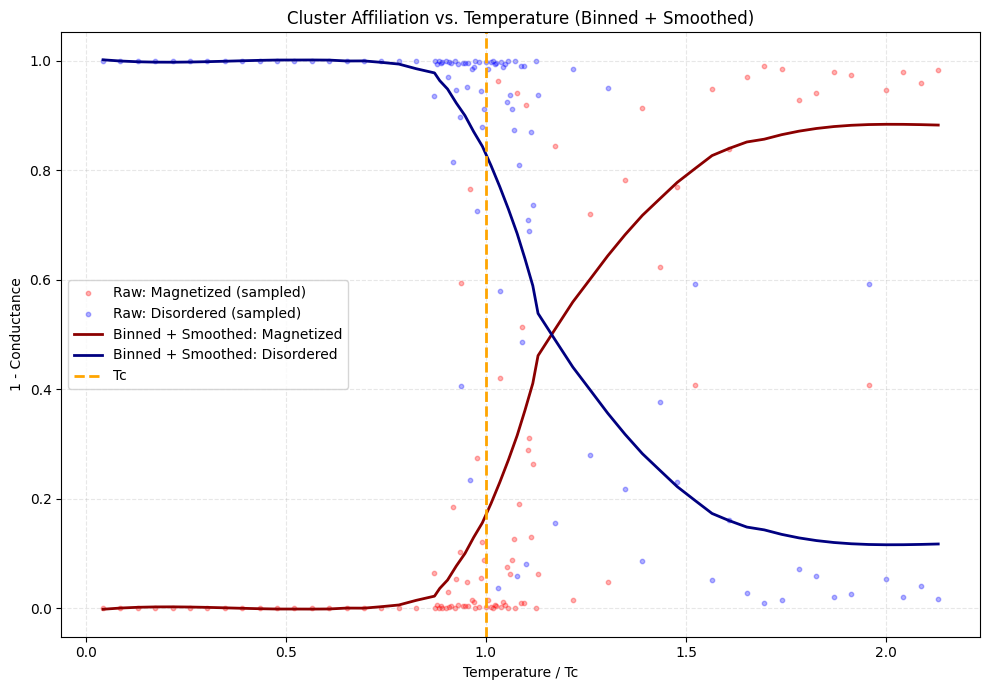

In [33]:
# Sort data by scaled temperature
sorted_indices = np.argsort(temps_scaled)
temps_sorted = temps_scaled[sorted_indices]
magnetized_sorted = (1 - magnetized_score)[sorted_indices]
disordered_sorted = (1 - disordered_score)[sorted_indices]

# Binning parameters
num_bins = 100
bins = np.linspace(temps_sorted.min(), temps_sorted.max(), num_bins + 1)
bin_indices = np.digitize(temps_sorted, bins)

def bin_average(x, y, bin_indices, num_bins):
    binned_x = []
    binned_y = []
    for i in range(1, num_bins + 1):
        mask = bin_indices == i
        if np.any(mask):
            binned_x.append(np.mean(x[mask]))
            binned_y.append(np.mean(y[mask]))
    return np.array(binned_x), np.array(binned_y)

# Compute binned averages
binned_temps_mag, binned_mag = bin_average(temps_sorted, magnetized_sorted, bin_indices, num_bins)
binned_temps_dis, binned_dis = bin_average(temps_sorted, disordered_sorted, bin_indices, num_bins)

# Savitzky-Golay smoothing on binned data
window = 21 if len(binned_temps_mag) >= 21 else (len(binned_temps_mag) // 2) * 2 + 1
mag_smooth = savgol_filter(binned_mag, window_length=window, polyorder=3)
dis_smooth = savgol_filter(binned_dis, window_length=window, polyorder=3)

# Plot
plt.figure(figsize=(10, 7))

# Raw scatter (downsampled for visibility)
plt.scatter(temps_sorted[::len(temps_sorted)//100], magnetized_sorted[::len(magnetized_sorted)//100],
            color='red', s=10, alpha=0.3, label='Raw: Magnetized (sampled)')
plt.scatter(temps_sorted[::len(temps_sorted)//100], disordered_sorted[::len(disordered_sorted)//100],
            color='blue', s=10, alpha=0.3, label='Raw: Disordered (sampled)')

# Binned + smoothed curves
plt.plot(binned_temps_mag, mag_smooth, color='darkred', linewidth=2, label='Binned + Smoothed: Magnetized')
plt.plot(binned_temps_dis, dis_smooth, color='navy', linewidth=2, label='Binned + Smoothed: Disordered')

plt.axvline(1.0, color='orange', linewidth=2, linestyle='--', label='Tc')

plt.xlabel("Temperature / Tc")
plt.ylabel("1 - Conductance")
plt.title("Cluster Affiliation vs. Temperature (Binned + Smoothed)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# output_data = np.column_stack([binned_temps_mag, mag_smooth, binned_dis, dis_smooth])
# np.savetxt("model16_conductance.csv", output_data,
#            delimiter=",", header="temp_scaled,magnetized_smoothed,disordered_smoothed", comments='')

Peak derivative at scaled temperature = 1.130


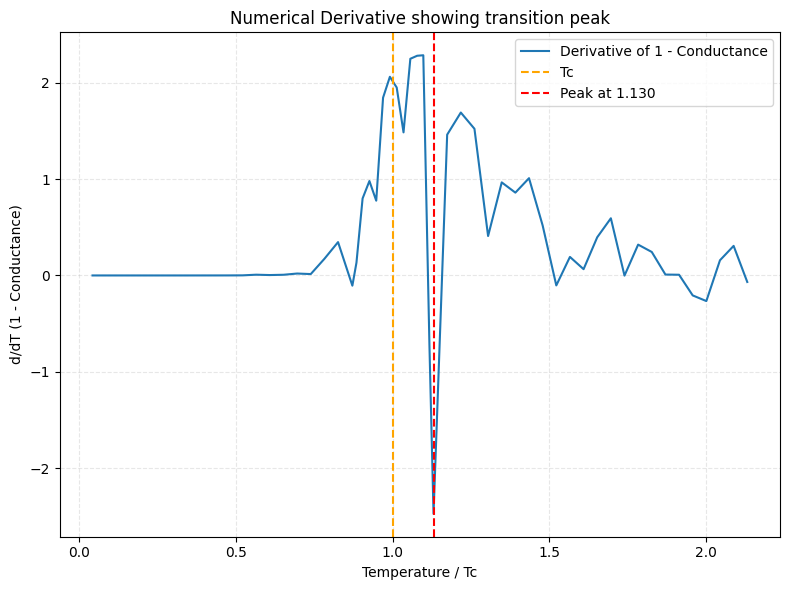

In [36]:
num_bins = 100
bins = np.linspace(temps_scaled.min(), temps_scaled.max(), num_bins + 1)
bin_indices = np.digitize(temps_scaled, bins)

y_mag = 1 - magnetized_score

# Bin averages for your data vector y_mag (1 - magnetized_score)
binned_temps, binned_y_mag = bin_average(temps_scaled, y_mag, bin_indices, num_bins)

# Compute numerical derivative using np.gradient
# np.gradient returns the gradient at each point, spacing=binned_temps spacing
dy_dT = np.gradient(binned_y_mag, binned_temps)

# Find peak derivative location
peak_idx = np.argmax(np.abs(dy_dT))
peak_temp = binned_temps[peak_idx]
print(f"Peak derivative at scaled temperature = {peak_temp:.3f}")

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(binned_temps, dy_dT, label='Derivative of 1 - Conductance')
plt.axvline(1.0, color='orange', linestyle='--', label='Tc')
plt.axvline(peak_temp, color='red', linestyle='--', label=f'Peak at {peak_temp:.3f}')
plt.xlabel('Temperature / Tc')
plt.ylabel('d/dT (1 - Conductance)')
plt.title('Numerical Derivative showing transition peak')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

np.savetxt("model8_derivative.csv", np.column_stack([binned_temps, dy_dT]),
           delimiter=",", header="temp_scaled,dy_dT", comments='')

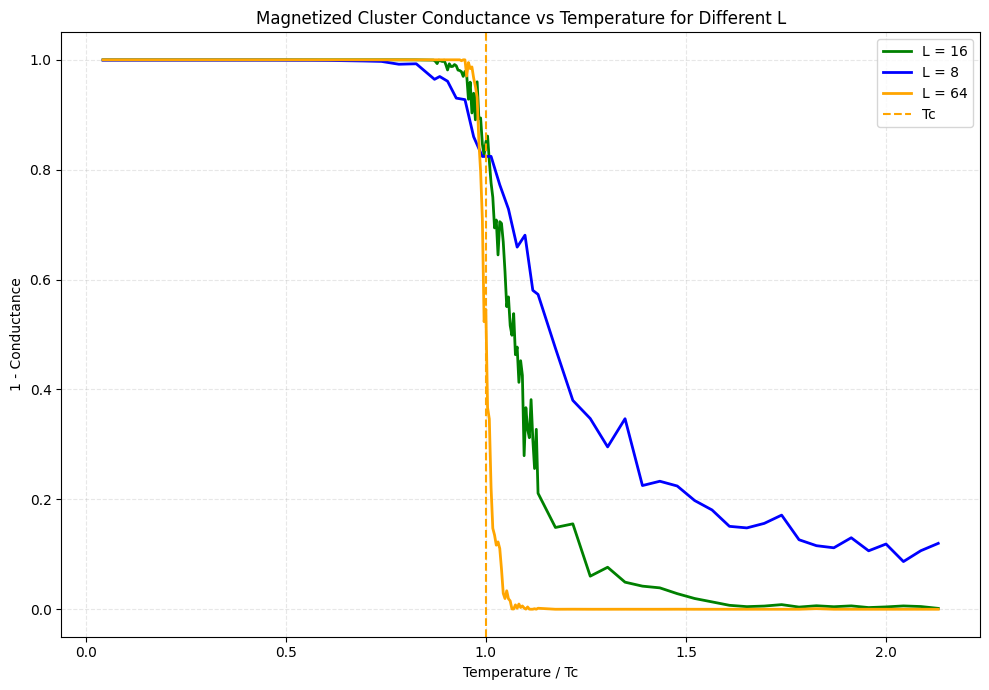

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
# data1 = np.loadtxt("model1_conductance.csv", delimiter=",", skiprows=1)
data2 = np.loadtxt("model2_conductance.csv", delimiter=",", skiprows=1)
data3 = np.loadtxt("model3_conductance.csv", delimiter=",", skiprows=1)
data4 = np.loadtxt("model4_conductance.csv", delimiter=",", skiprows=1)

# Extract temperature and smoothed magnetized conductance
# temp1, mag1 = data1[:, 0], data1[:, 2]
temp2, mag2 = data2[:, 0], data2[:, 2]
temp3, mag3 = data3[:, 0], data3[:, 2]
temp4, mag4 = data4[:, 0], data4[:, 2]

# Plot
plt.figure(figsize=(10, 7))
# plt.plot(temp1, mag1, label="L = 32", linewidth=2, color='red')
plt.plot(temp2, mag2, label="L = 16", linewidth=2, color='green')
plt.plot(temp3, mag3, label="L = 8", linewidth=2, color='blue')
plt.plot(temp4, mag4, label="L = 64", linewidth=2, color='orange')

# Tc reference line
plt.axvline(1.0, color='orange', linestyle='--', label='Tc')

# Labels and legend
plt.xlabel("Temperature / Tc")
plt.ylabel("1 - Conductance")
plt.title("Magnetized Cluster Conductance vs Temperature for Different L")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


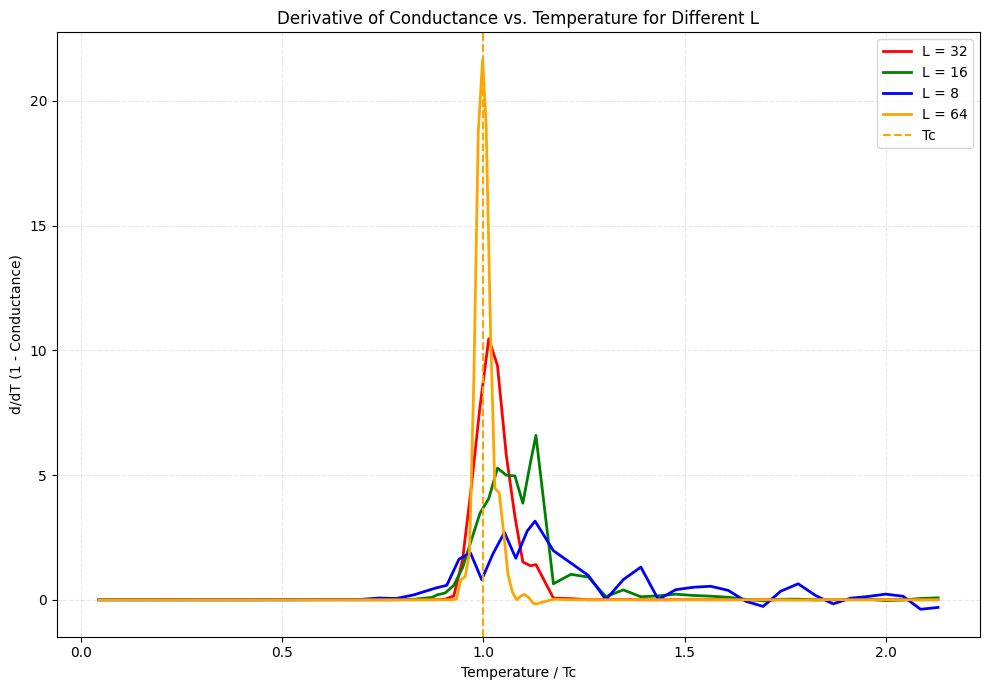

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Load derivative data
deriv1 = np.loadtxt("model32_derivative.csv", delimiter=",", skiprows=1)
deriv2 = np.loadtxt("model16_derivative.csv", delimiter=",", skiprows=1)
deriv3 = np.loadtxt("model3_derivative.csv", delimiter=",", skiprows=1)
deriv4 = np.loadtxt("model4_derivative.csv", delimiter=",", skiprows=1)

# Extract temp and derivative values
temp1, dy1 = deriv1[:, 0], deriv1[:, 1]
temp2, dy2 = deriv2[:, 0], deriv2[:, 1]
temp3, dy3 = deriv3[:, 0], deriv3[:, 1]
temp4, dy4 = deriv4[:, 0], deriv4[:, 1]

# Plot
plt.figure(figsize=(10, 7))
plt.plot(temp1, dy1, label="L = 32", linewidth=2, color='red')
plt.plot(temp2, dy2, label="L = 16", linewidth=2, color='green')
plt.plot(temp3, dy3, label="L = 8", linewidth=2, color='blue')
plt.plot(temp4, dy4, label="L = 64", linewidth=2, color='orange')

# Tc vertical reference line
plt.axvline(1.0, color='orange', linestyle='--', label='Tc')

# Labels and layout
plt.xlabel("Temperature / Tc")
plt.ylabel("d/dT (1 - Conductance)")
plt.title("Derivative of Conductance vs. Temperature for Different L")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


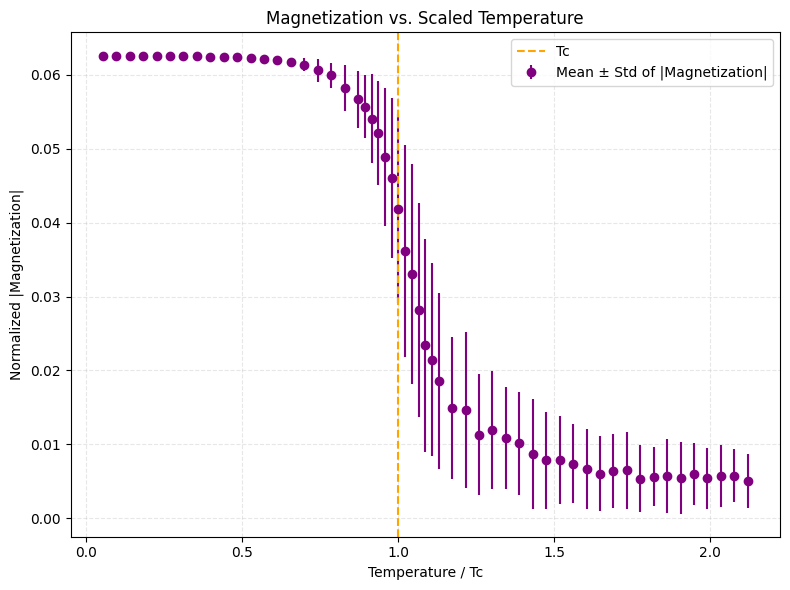

In [76]:

def bin_average(x, y, bin_indices, num_bins):
    binned_x = []
    binned_y = []
    for i in range(1, num_bins + 1):
        mask = bin_indices == i
        if np.any(mask):
            binned_x.append(np.mean(x[mask]))
            binned_y.append(np.mean(y[mask]))
    return np.array(binned_x), np.array(binned_y)

Tc = 2.3
temps = np.array(temperature_labels)  # Already loaded or computed
temps_scaled = temps / Tc

# Assume spins are ±1, normalize by L^2 (e.g., 64x64 lattice)
L = 64
magnetization_norm = np.abs(magnetizations) / (L * L)

# Optional: Bin temperatures
num_bins = 100
bins = np.linspace(min(temps_scaled), max(temps_scaled), num_bins)
bin_indices = np.digitize(temps_scaled, bins)

# Compute average and std in each bin
bin_means = []
bin_stds = []
bin_centers = []

for i in range(1, len(bins)):
    in_bin = magnetization_norm[bin_indices == i]
    if len(in_bin) > 0:
        bin_means.append(np.mean(in_bin))
        bin_stds.append(np.std(in_bin))
        bin_centers.append((bins[i-1] + bins[i]) / 2)

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o', color='purple', label='Mean ± Std of |Magnetization|')

plt.axvline(1.0, color='orange', linestyle='--', label='Tc')

plt.xlabel("Temperature / Tc")
plt.ylabel("Normalized |Magnetization|")
plt.title("Magnetization vs. Scaled Temperature")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Peak derivative at scaled temperature = 1.035


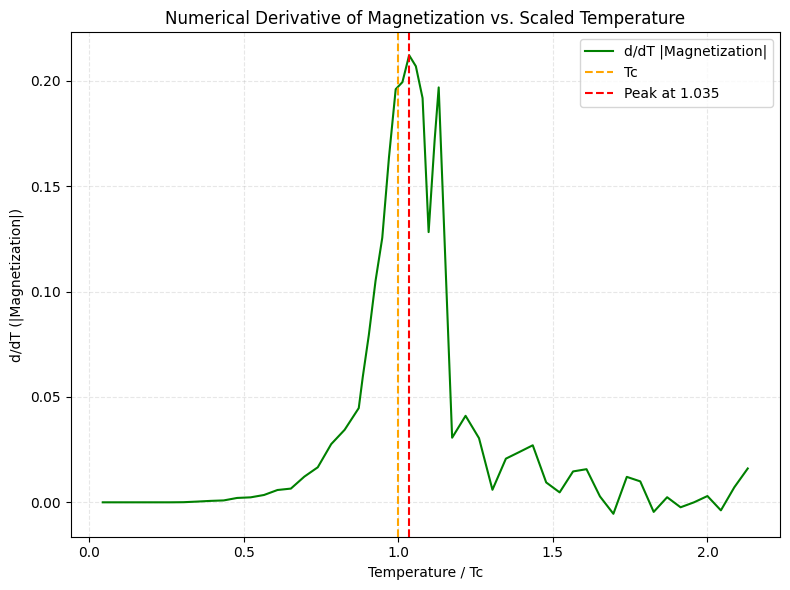

In [73]:

L=16
magnetizations = np.sum(flat_data, axis=1)
magnetizations_norm = np.abs(magnetizations) / (L * L)

temperature_labels = temperature_list*100

# Assumed inputs
Tc = 2.3
temps_scaled = np.array(temperature_labels) / Tc
L = 64  # Lattice size
magnetizations_norm = np.abs(magnetizations) / (L * L)

# Bin configuration
num_bins = 100
bins = np.linspace(temps_scaled.min(), temps_scaled.max(), num_bins + 1)
bin_indices = np.digitize(temps_scaled, bins)

# Compute binned averages
binned_temps, binned_mag = bin_average(temps_scaled, magnetizations_norm, bin_indices, num_bins)

# Derivative
dy_dT = -np.gradient(binned_mag, binned_temps)

# Find peak in derivative
peak_idx = np.argmax(np.abs(dy_dT))
peak_temp = binned_temps[peak_idx]
print(f"Peak derivative at scaled temperature = {peak_temp:.3f}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(binned_temps, dy_dT, label='d/dT |Magnetization|', color='green')
plt.axvline(1.0, color='orange', linestyle='--', label='Tc')
plt.axvline(peak_temp, color='red', linestyle='--', label=f'Peak at {peak_temp:.3f}')
plt.xlabel('Temperature / Tc')
plt.ylabel('d/dT (|Magnetization|)')
plt.title('Numerical Derivative of Magnetization vs. Scaled Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Save data
# np.savetxt("magnetization_derivative64.csv", np.column_stack([binned_temps, dy_dT]),
#            delimiter=",", header="temp_scaled,dMag_dT", comments='')


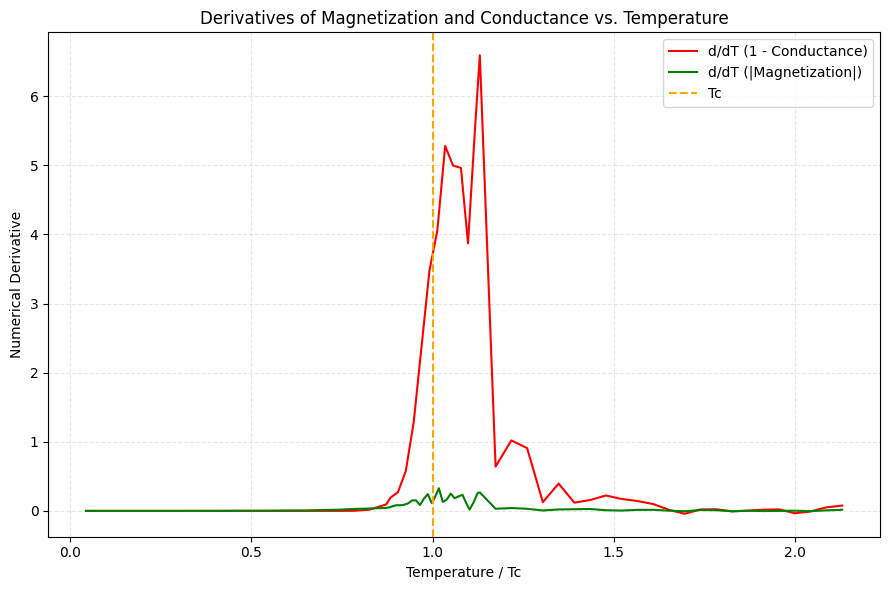

In [75]:
# Load CSVs
conductance_data = np.loadtxt("model16_derivative.csv", delimiter=",", skiprows=1)
magnetization_data = np.loadtxt("magnetization_derivative16.csv", delimiter=",", skiprows=1)

# Unpack
temps_conductance, dC_dT = conductance_data[:, 0], conductance_data[:, 1]
temps_magnetization, dM_dT = magnetization_data[:, 0], magnetization_data[:, 1]

# Plot
plt.figure(figsize=(9, 6))
plt.plot(temps_conductance, dC_dT, label='d/dT (1 - Conductance)', color='red')
plt.plot(temps_magnetization, dM_dT, label='d/dT (|Magnetization|)', color='green')

# Add Tc line
plt.axvline(1.0, color='orange', linestyle='--', label='Tc')

# Labels and formatting
plt.xlabel("Temperature / Tc")
plt.ylabel("Numerical Derivative")
plt.title("Derivatives of Magnetization and Conductance vs. Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


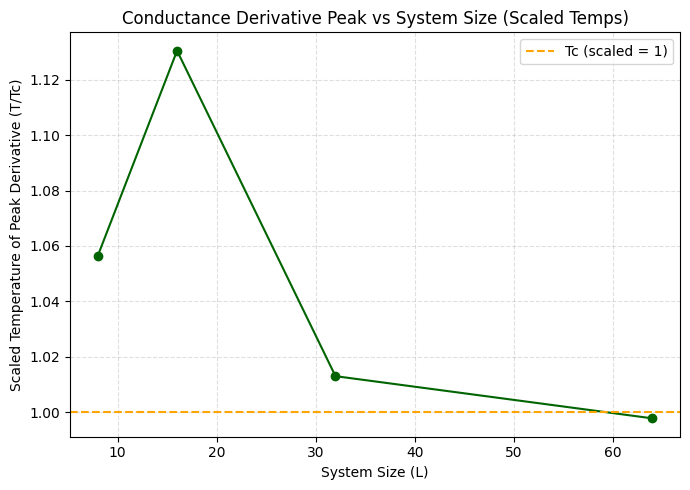

In [55]:
from re import T
import matplotlib.pyplot as plt

#
# Critical temperature (for scaled temps)
Tc = 2.3

# === Manually specify each file and its corresponding L ===
derivative_files = {
    64:  "model4_derivative.csv",
    32:  "model32_derivative.csv",
    16:  "model16_derivative.csv",
    8:   "model8_derivative.csv",
}

L_vals = []
peak_scaled_temps = []

for L, file in derivative_files.items():
    data = np.loadtxt(file, delimiter=',', skiprows=1)
    temps_scaled = data[:, 0]
    dy_dT = data[:, 1]

    peak_idx = np.argmax(np.abs(dy_dT))
    peak_temp_scaled = temps_scaled[peak_idx]

    L_vals.append(L)
    peak_scaled_temps.append(peak_temp_scaled)

# Plot scaled temperature vs L
plt.figure(figsize=(7, 5))
plt.plot(L_vals, peak_scaled_temps, 'o-', color='darkgreen')
plt.axhline(1.0, color='orange', linestyle='--', label='Tc (scaled = 1)')
plt.xlabel("System Size (L)")
plt.ylabel("Scaled Temperature of Peak Derivative (T/Tc)")
plt.title("Conductance Derivative Peak vs System Size (Scaled Temps)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

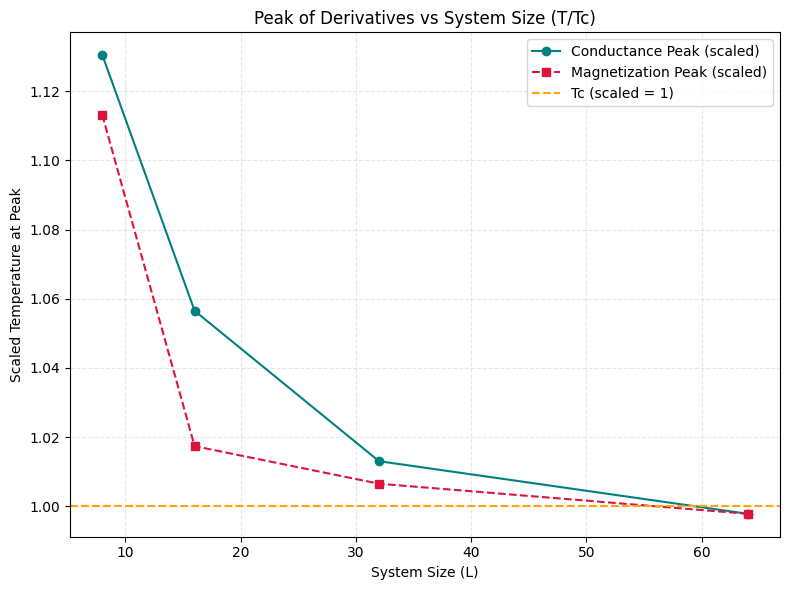

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Tc is already factored into scaled temps, so no need to scale anything
Tc = 2.3

# Define your files per L
derivative_files = {
    64:  "model4_derivative.csv",
    32:  "model32_derivative.csv",
    16:  "model16_derivative.csv",
    8:   "model8_derivative.csv",
}

# Matching magnetization derivative files
magnetization_files = {
    64:  "magnetization_derivative64.csv",
    32:  "magnetization_derivative32.csv",
    16:  "magnetization_derivative16.csv",
    8:   "magnetization_derivative8.csv",
}

L_vals = []
peak_conductance = []
peak_magnetization = []

for L in derivative_files:
    # Load conductance derivative
    cond_data = np.loadtxt(derivative_files[L], delimiter=',', skiprows=1)
    cond_temp_scaled = cond_data[:, 0]
    cond_deriv = cond_data[:, 1]
    cond_peak_idx = np.argmax(np.abs(cond_deriv))
    cond_peak_temp = cond_temp_scaled[cond_peak_idx]

    # Load magnetization derivative
    mag_data = np.loadtxt(magnetization_files[L], delimiter=',', skiprows=1)
    mag_temp_scaled = mag_data[:, 0]
    mag_deriv = mag_data[:, 1]
    mag_peak_idx = np.argmax(np.abs(mag_deriv))
    mag_peak_temp = mag_temp_scaled[mag_peak_idx]

    # Store results
    L_vals.append(L)
    peak_conductance.append(cond_peak_temp)
    peak_magnetization.append(mag_peak_temp)

# === Plot ===
plt.figure(figsize=(8, 6))
plt.plot(L_vals, peak_conductance, 'o-', label='Conductance Peak (scaled)', color='teal')
plt.plot(L_vals, peak_magnetization, 's--', label='Magnetization Peak (scaled)', color='crimson')

plt.axhline(1.0, color='orange', linestyle='--', label='Tc (scaled = 1)')
plt.xlabel("System Size (L)")
plt.ylabel("Scaled Temperature at Peak")
plt.title("Peak of Derivatives vs System Size (T/Tc)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
